# **Introduction**

The dataset provided appears to pertain to electric vehicles (EVs) registered in Washington State. It includes detailed information on each vehicle, such as make, model, electric vehicle type, electric range, and more. The data seems to encompass various aspects of EV usage and registration, including geographical distribution, manufacturer details, and eligibility for clean alternative fuel vehicle incentives.

# **Objective**

- **Data Cleaning and Preparation**: Ensure the dataset is clean and ready for analysis by handling missing values, checking for duplicates, and understanding the structure and types of data available.

- **Descriptive Analysis**: Perform initial descriptive statistics to summarize the key characteristics of the data, including distributions of numerical and categorical variables.

- **Exploratory Data Analysis (EDA)**: Provide a deeper understanding of the dataset through visualizations and further exploration, focusing on patterns and insights related to EV registrations, vehicle characteristics, and potential trends in EV adoption.

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# **Basic Understanding of The Data**

In [2]:
# Import df & show sample

df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
11449,5YJYGDEF5L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,17.0,261406064,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
401,5YJYGDEFXL,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,45.0,127088734,POINT (-122.1368031 47.7621254),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177931,5YJ3E1EB9K,Chelan,Chelan,WA,98816.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,12.0,304739508,POINT (-120.0453013 47.8563197),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
28205,ZACPDFCW4R,King,Tukwila,WA,98188.0,2024,DODGE,HORNET,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,11.0,264905119,POINT (-122.271716 47.452837),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
147865,5YJYGDEE9L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,1.0,125781806,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


# **Data Exploration**

In [3]:
# Show df Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,df Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,df Type,Null,Null (%),Unique,Unique Sample
0,VIN (1-10),object,0,0.000000,11695,"[1C4RJXN66R, KNDJX3AEXG, 5YJ3E1EA3L, 1G1RC6S5X..."
1,County,object,9,0.004634,198,"[Snohomish, King, Kitsap, Yakima, Thurston]"
2,City,object,9,0.004634,756,"[Everett, Renton, Seattle, Port Orchard, Monroe]"
3,State,object,0,0.000000,46,"[WA, BC, CA, MD, VA]"
4,Postal Code,float64,9,0.004634,905,"[98204.0, 98058.0, 98125.0, 98367.0, 98272.0]"
5,Model Year,int64,0,0.000000,22,"[2024, 2016, 2020, 2017, 2023]"
6,Make,object,0,0.000000,42,"[JEEP, KIA, TESLA, CHEVROLET, BMW]"
7,Model,object,0,0.000000,151,"[WRANGLER, SOUL, MODEL 3, VOLT, X5]"
8,Electric Vehicle Type,object,0,0.000000,2,"[Plug-in Hybrid Electric Vehicle (PHEV), Batte..."
9,Clean Alternative Fuel Vehicle (CAFV) Eligibility,object,0,0.000000,3,"[Not eligible due to low battery range, Clean ..."


In [5]:
# Show df Rows & Features Number
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

# Check duplicated value
df.duplicated().sum()

Total Rows : 194232
Total Features : 17


0

In [6]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,194223.000000,194232.000000,194230.000000,194230.000000,193800.000000,194232.000000,194223.000000
mean,98175.800678,2020.781807,54.835458,978.730732,29.009954,224892308.733782,52975324850.620842
std,2435.345863,2.999041,89.614355,7988.719011,14.901335,73578304.399905,1607770292.874245
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4385.000000,1001020100.000000
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,187225086.500000,53033009801.000000
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,233940241.000000,53033029805.000000
75%,98372.000000,2023.000000,68.000000,0.000000,42.000000,260115925.500000,53053073118.000000
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,479254772.000000,56021001100.000000


# **Data Cleaning**

In [8]:
# Handling Missing Values

# 1. For columns like County, City, Postal Code, Electric Utility, and 2020 Census Tract,
# we can choose to drop rows with missing values since these are categorical fields and it's only a few records.
df_cleaned = df.dropna(subset=['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract'])

# 2. For 'Electric Range' and 'Base MSRP', since there are only 2 missing values each, we can also drop those records.
df_cleaned = df_cleaned.dropna(subset=['Electric Range', 'Base MSRP'])

# 3. 'Legislative District' has a significant number of missing values. We will fill these missing values with a placeholder 'Unknown' to retain those records.
df_cleaned['Legislative District'] = df_cleaned['Legislative District'].fillna('Unknown')

# 4. Re-check the missing values after cleaning
cleaned_missing_values = df_cleaned.isnull().sum()

# Re-check missing values after cleaning
cleaned_missing_values = df_cleaned.isnull().sum()

# Displaying the cleaned dataframe and missing values
df_cleaned, cleaned_missing_values


In [9]:
df_cleaned.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
60447,WVGKMPE20N,King,Seattle,WA,98115.0,2022,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,43.0,231174555,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
9918,1N4BZ0CP6H,King,Kent,WA,98030.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107.0,0.0,47.0,126146772,POINT (-122.1994204 47.3741045),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
105207,WP0AD2Y10N,King,Redmond,WA,98052.0,2022,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,208049488,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
24447,JTMABABA7P,King,Tukwila,WA,98188.0,2023,SUBARU,SOLTERRA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,11.0,251112970,POINT (-122.271716 47.452837),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
70862,WP1AE2A2XG,Kitsap,Seabeck,WA,98380.0,2016,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,35.0,261966659,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10


## **Distribution of Electric Vehicles by County and City**

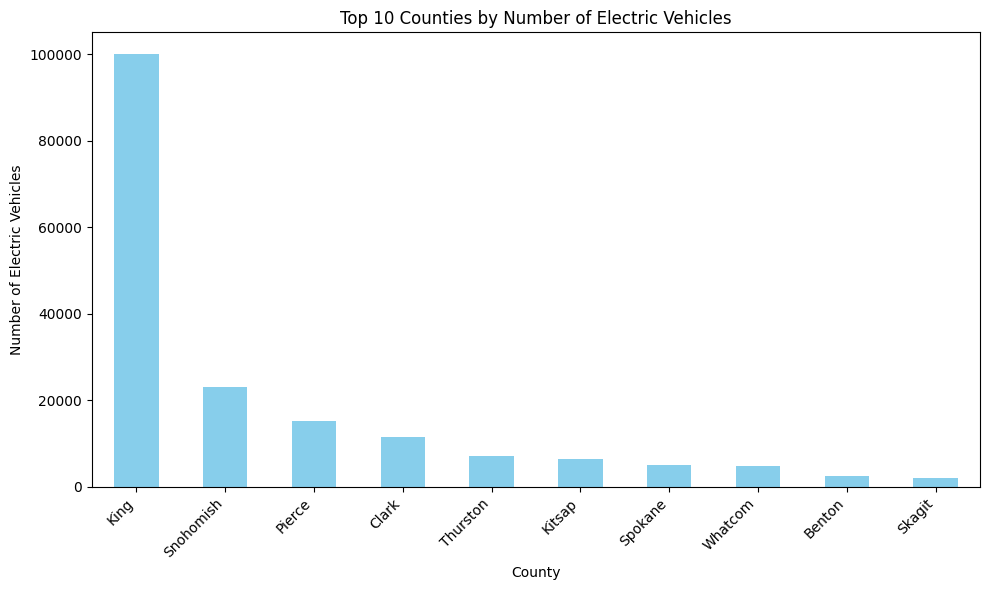

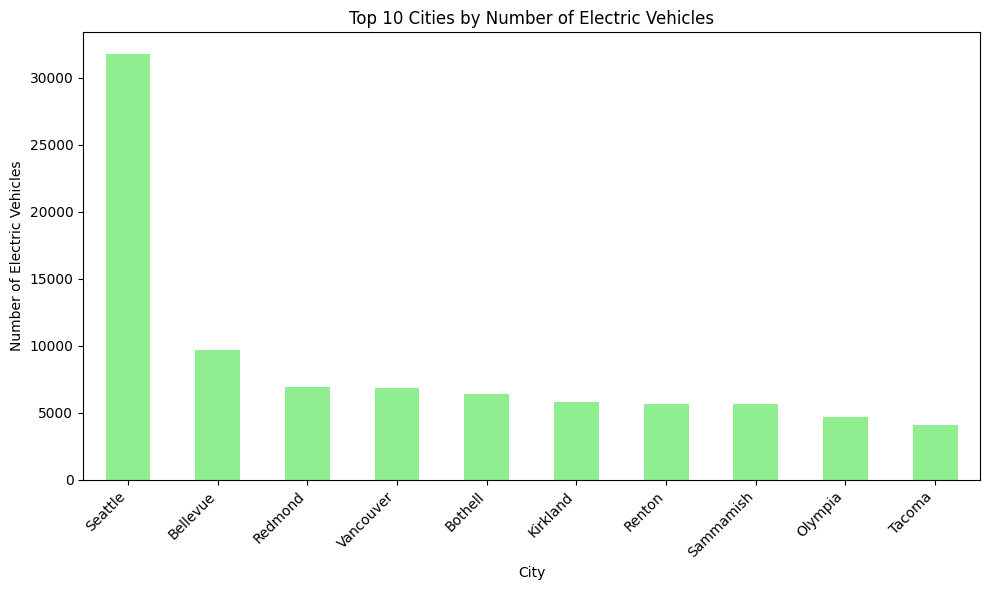

In [10]:
# Aggregating the data by County and City to get counts of Electric Vehicles
county_ev_counts = df_cleaned['County'].value_counts().head(10)  # Top 10 counties
city_ev_counts = df_cleaned['City'].value_counts().head(10)  # Top 10 cities

# Plotting the number of Electric Vehicles by County
plt.figure(figsize=(10, 6))
county_ev_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Counties by Number of Electric Vehicles')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the number of Electric Vehicles by City
plt.figure(figsize=(10, 6))
city_ev_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities by Number of Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Top Counties**: The county with the highest concentration of electric vehicles is King County, followed by Snohomish County and Pierce County. This suggests that electric vehicle adoption is highest in the more urbanized areas around major cities like Seattle.
- **Top Cities**: Seattle leads by a large margin in terms of electric vehicle registrations, followed by Bellevue and Redmond. These cities are known for being tech hubs and having higher incomes, which might correlate with a higher rate of EV adoption.

## **Vehicle Type Analysis**

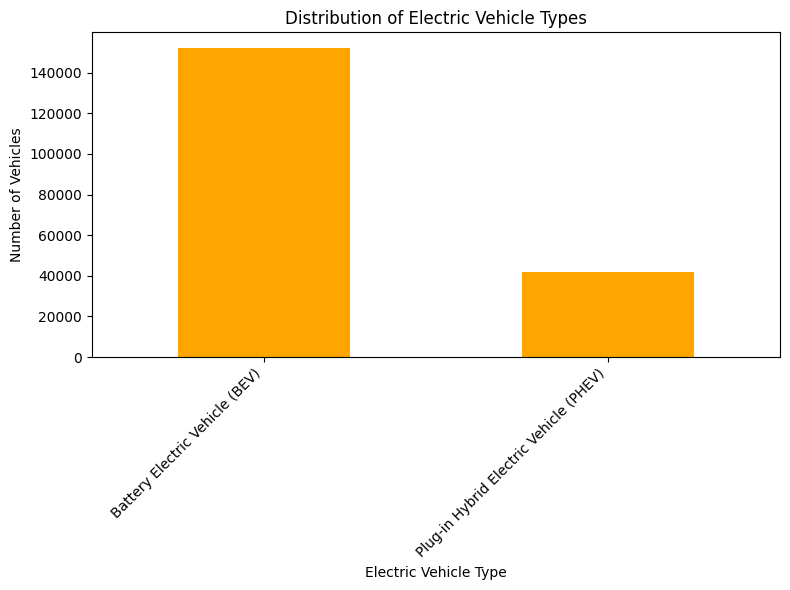

In [11]:
# Analyzing the popularity of different Electric Vehicle Types
ev_type_counts = df_cleaned['Electric Vehicle Type'].value_counts()

# Plotting the Electric Vehicle Types
plt.figure(figsize=(8, 6))
ev_type_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Battery Electric Vehicles (BEV) make up the majority of electric vehicles in the dataset, indicating that fully electric vehicles are more popular compared to Plug-in Hybrid Electric Vehicles (PHEV).
- The higher adoption of BEVs suggests a shift towards fully electric solutions rather than hybrid options, possibly due to improved charging infrastructure, increased range, and environmental concerns.

## **Electric Range Analysis**

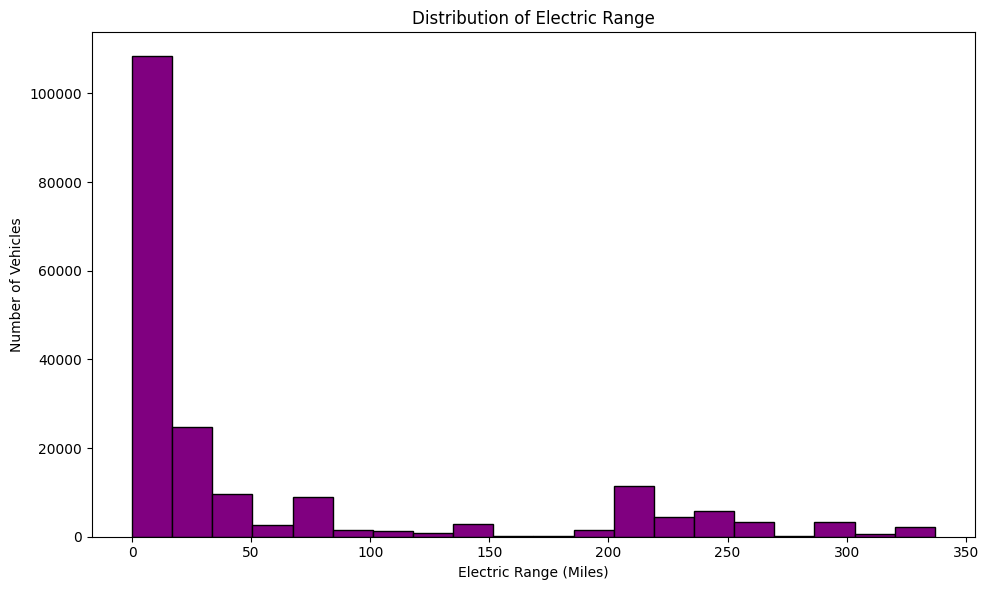

In [12]:
# Analyzing the distribution of Electric Range
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Electric Range'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

- The distribution of electric ranges shows a wide variety, with most vehicles clustering around lower ranges (below 100 miles), likely reflecting older or hybrid models.
- There is also a significant number of vehicles with ranges between 200 to 300 miles, indicating the popularity of more recent fully electric vehicles, particularly BEVs with higher battery capacities.
- The concentration of vehicles with mid-to-high range (100 to 300 miles) suggests that consumers are favoring vehicles with longer ranges, possibly due to advancements in battery technology and increasing consumer demand for practical range.

## **Manufacturer Analysis**

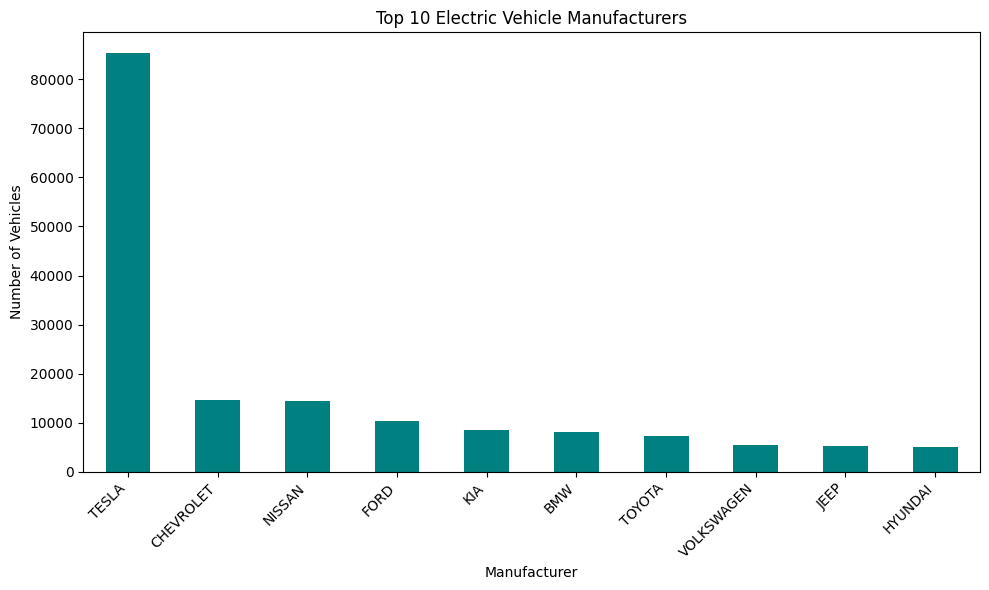

In [13]:
# Analyzing the distribution of Electric Vehicles by Manufacturer
manufacturer_counts = df_cleaned['Make'].value_counts().head(10)  # Top 10 manufacturers

# Plotting the number of Electric Vehicles by Manufacturer
plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Tesla** is by far the dominant manufacturer in the electric vehicle space, reflecting its leadership in both the BEV market and consumer interest in long-range, high-performance electric cars.
- Other notable manufacturers include **Chevrolet**, **Nissan**, and **BMW**, which offer popular electric and plug-in hybrid models. However, Tesla’s dominance suggests that its vehicles are driving a significant portion of the EV adoption.
- The presence of **Kia**, **Ford**, and **Toyota** in the top 10 also indicates growing interest from traditional automakers, reflecting a competitive landscape in the EV market.

## **CAFV Eligibility**

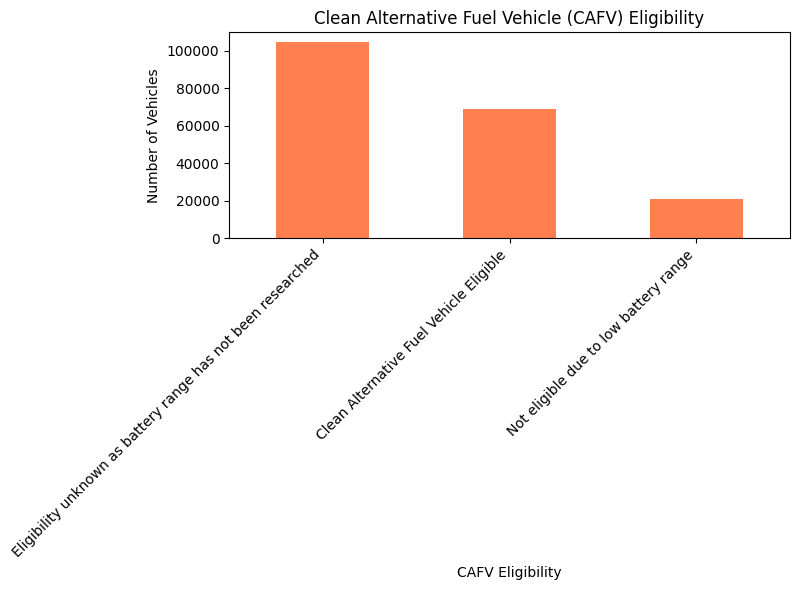

In [14]:
# Analyzing Clean Alternative Fuel Vehicle (CAFV) Eligibility
cafv_eligibility_counts = df_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plotting the CAFV Eligibility distribution
plt.figure(figsize=(8, 6))
cafv_eligibility_counts.plot(kind='bar', color='coral')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- A significant majority of electric vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives. This reflects the fact that most electric and plug-in hybrid vehicles meet the environmental and performance standards required for these incentives.
- A smaller portion of vehicles are not eligible, likely due to factors such as lower electric range or older technology that doesn't meet the latest standards.

## **Legislative Insights**

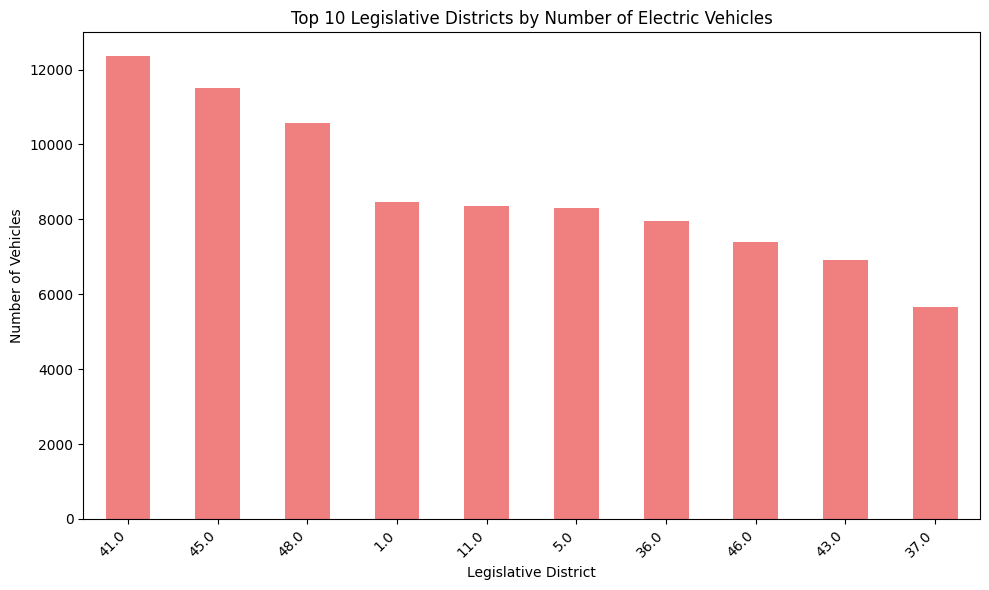

In [15]:
# Analyzing the distribution of Electric Vehicles by Legislative District
legislative_district_counts = df_cleaned['Legislative District'].value_counts().head(10)  # Top 10 districts

# Plotting the number of Electric Vehicles by Legislative District
plt.figure(figsize=(10, 6))
legislative_district_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Legislative Districts by Number of Electric Vehicles')
plt.xlabel('Legislative District')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- The top 10 legislative districts show a significant concentration of electric vehicles in specific areas. This suggests that some districts are more proactive in adopting electric vehicles, potentially due to demographic factors, local policies, or infrastructure investments.
- The legislative districts with the highest adoption rates may benefit from policies that promote clean energy, as well as higher income levels that enable the purchase of electric vehicles.